In [3]:
import string

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 7

import spacy
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

ner = spacy.load('en_core_web_sm')


import string
import unicodedata

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
from wordcloud import STOPWORDS, WordCloud

rcParams['figure.figsize'] = 15, 7

import re
import unicodedata
from string import punctuation

import nltk
import spacy
from autocorrect import Speller, spell
from bs4 import BeautifulSoup
from contractions import contractions_dict
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from wordcloud import STOPWORDS, WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import dill


In [5]:
#dill.dump_session('Retaurant_Review.db')
#dill.load_session('Retaurant_Review.db')

In [8]:
restaurant = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')
restaurant

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [6]:
restaurant['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

***
### Data is balanced. WE will go with accuracy
***

In [12]:

restaurant['len'] = restaurant['Review'].apply(len)
restaurant

,Review,Liked,len
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


Text(0.5, 1.0, 'Not Liked word count')

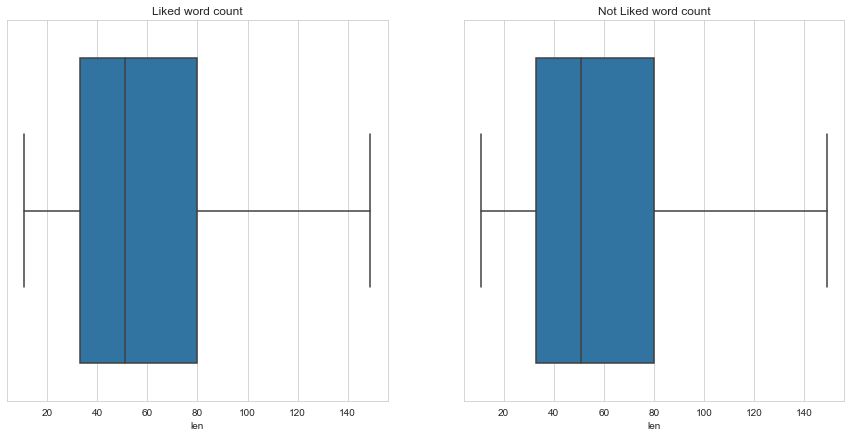

In [27]:
sns.set_style('whitegrid')
fif, ax = plt.subplots(1,2, figsize=(15,7))
sns.boxplot(x=restaurant.len, data= restaurant[restaurant['Liked'] ==1], ax=ax[0]).set_title('Liked word count')
sns.boxplot(x=restaurant.len, data= restaurant[restaurant['Liked'] ==0], ax=ax[1]).set_title('Not Liked word count')

***
### The reviews average length remains same for both liked and not liked
***

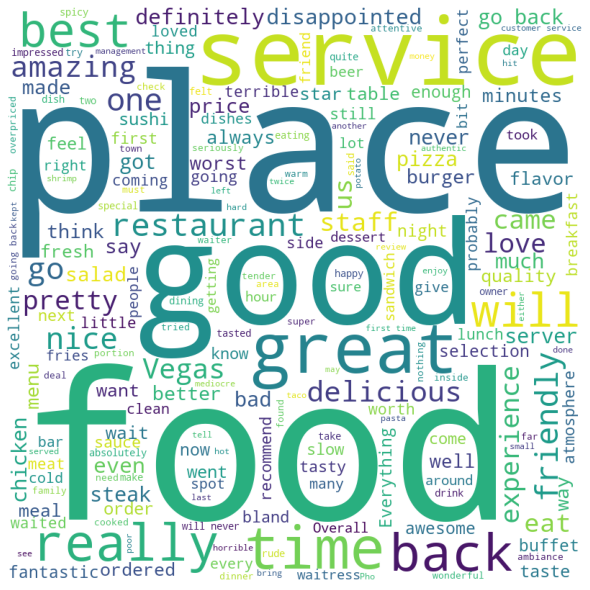

In [30]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(' '.join(restaurant['Review']))

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

***
### We can see what people have mostly used to express sentiments. There more words that express sentiments than details about food or place
***

***
### Text preprocessing methods ->
***

In [62]:
# text preprocessing methods
snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

contractions_dict = {     
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I had",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

def lemmatize( text):
    """
    take string input and lemmatize the words.
    use WordNetLemmatizer to lemmatize the words.
    """
    word_tokens = nltk.word_tokenize(text)
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in word_tokens]
    return (" ".join(lemmatized_word))

def remove_numbers(text):
    """
    take string input and return a clean text without numbers. 
    Use regex to discard the numbers.
    """
    output = ''.join(c for c in text if not c.isdigit())
    return output

def remove_punct(text):
    """
    take string input and clean string without punctuations.
    use regex to remove the punctuations.
    """
    return ''.join(c for c in text if c not in punctuation)

def remove_stopwords(sentence):
    """
    removes all the stop words like "is,the,a, etc."
    5 lines of code can be written in one line as:
        return ' '.join([w for w in word_tokenize(sentence) if not w in stop_words]) 
    """
    clean_sent =[]
    for w in word_tokenize(sentence):
        if not w in stop_words:
            clean_sent.append(w)
    return " ".join(clean_sent)

def remove_Tags(text):
    """
    take string input and clean string without tags.
    use regex to remove the html tags.
    """
    cleaned_text = re.sub('<[^<]+?>','', text)
    return cleaned_text

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

def sentence_tokenize(text):
    """
    take string input and return list of sentences.
    use nltk.sent_tokenize() to split the sentences.
    """
    sent_list=[]
    for w in nltk.sent_tokenize(text):
        sent_list.append(w)
    return sent_list

def autospell(text):
    """
    correct the spelling of the word.
    """
    spells = [Speller().autocorrect_word(w) for w in (nltk.word_tokenize(text))]
    return " ".join(spells)

def stemming(text):
    """
    take string input and stem the words.
    use snowball_stemmer to stem the string.
    """
    word_tokens = nltk.word_tokenize(text)
    stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
    return " ".join(stemmed_word)

def to_lower(text):
    """
    Converting text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".
    """
    return ' '.join([w.lower() for w in word_tokenize(text)])

def word_tokenize( text):
    """
    take string input and return list of words.
    use nltk.word_tokenize() to split the words.
    """
    word_list=[]
    for sentences in nltk.sent_tokenize(text):
        for words in nltk.word_tokenize(sentences):
            word_list.append(words)
    return word_list

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
    #remove_accented_chars('Sómě Áccěntěd těxt')

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                    flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def pre_process1( text):
    """
    """
    text = remove_accented_chars(text)
    text = expand_contractions(text, contractions_dict)
    text = remove_punct(text)
    text = autospell(text)
    text = to_lower(text)
    text = remove_stopwords(text)
    text = remove_numbers(text)
    #text = lemmatize(text)
    text = stemming(text)
    text = word_tokenize(text)
    return text


def pre_process2(text):
        lower_text = to_lower(text)
        sentence_tokens = sentence_tokenize(lower_text)
        word_list = []
        for each_sent in sentence_tokens:
            lemmatizzed_sent = lemmatize(each_sent)
            clean_text = remove_numbers(lemmatizzed_sent)
            clean_text = remove_punct(clean_text)
            clean_text = remove_Tags(clean_text)
            clean_text = remove_stopwords(clean_text)
            word_tokens = word_tokenize(clean_text)
            for i in word_tokens:
                word_list.append(i)
        return word_list

def pre_processing3(document):
  #1. Remove Punctuations
  sentWithoutPunct = ''.join([char for char in document  if char not in string.punctuation])
  #2. Extract words out of the sentences
  words = sentWithoutPunct.split()
  #3. Normalize the data (lowercase)
  wordNormalized = [word.lower() for word in words]
  # 4. Remove Stopwords
  vocabulary = [word for word in wordNormalized if word not in stopwords.words('english')]
  # 5. Apply Stemming
  # a. Exclude those words with NER prop 
  ner_words = [tokens.text for tokens in ner(document).ents]
  # b. perform Stemming with other words
  stemmed = [PorterStemmer().stem(word) for word in vocabulary if word not in ner_words]

  return stemmed


In [63]:
# extract features and labels
features = restaurant['Review']
label = restaurant['Liked']

In [64]:
# apply on first 10 rows of reviews preprocessing
restaurant['preproc_Review'] = restaurant['Review'].apply(pre_process1)
restaurant

,Review,Liked,len,preproc_Review
0,Wow... Loved this place.,1,24,"[wow, love, place]"
1,Crust is not good.,0,18,"[trust, good]"
2,Not tasty and the texture was just nasty.,0,41,"[tasti, textur, nasti]"
3,Stopped by during the late May bank holiday of...,1,87,"[stop, late, may, bank, holiday, rick, steve, ..."
4,The selection on the menu was great and so wer...,1,59,"[select, menu, great, price]"
...,...,...,...,...
995,I think food should have flavor and texture an...,0,66,"[think, food, flavor, textur, lack]"
996,Appetite instantly gone.,0,24,"[appetit, instant, gone]"
997,Overall I was not impressed and would not go b...,0,50,"[overal, impress, would, go, back]"
998,"The whole experience was underwhelming, and I ...",0,91,"[whole, experi, underwhelm, think, go, ninja, ..."


***
### Preprocessed words most common
***

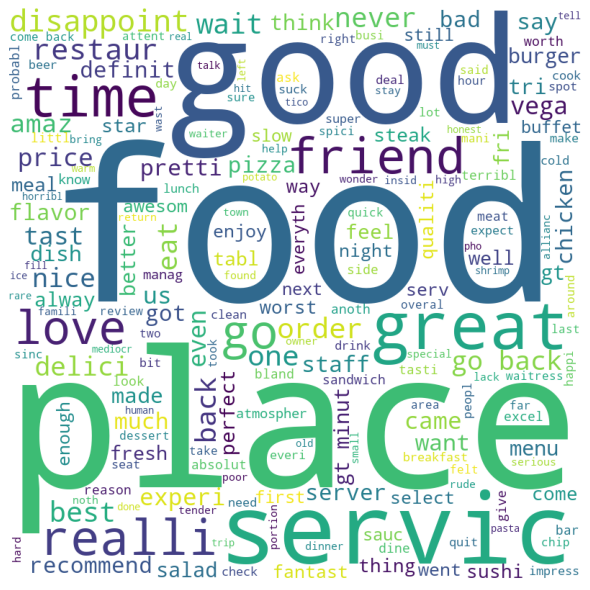

In [65]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(' '.join(restaurant['preproc_Review'].apply(' '.join).to_list()))

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [71]:
features = restaurant['Review']
label = restaurant['Liked']

In [74]:
# get tokens (with counts) from text documents
wordvector = CountVectorizer(analyzer=pre_process1)

# model learning vocabulary dict of tokens
vocabulary = wordvector.fit(features)

# from learned vocabulary tokens, get same tokens from test data( in this case feaures only)
bow = wordvector.transform(features)

In [77]:
tfdif_transformer = TfidfTransformer()

# Apply TFIDF Algo on BOW to create a feature set
tfdif_model = tfdif_transformer.fit(bow)

# Numeric Feature set
tdif_features = tfdif_model.transform(bow)
tdif_features


<1000x1517 sparse matrix of type '<class 'numpy.float64'>'
	with 5376 stored elements in Compressed Sparse Row format>

In [87]:
X_train, X_test, y_train, y_test = train_test_split(tdif_features, label, test_size=0.1, random_state=10)


train_accuracy:  0.9966666666666667
test_accuracy:  0.76


In [168]:
# ML model 
clf = DecisionTreeClassifier(random_state=10)
clf.fit(X_train, y_train)

train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print('train_accuracy: ', train_accuracy)
print('test_accuracy: ', test_accuracy)


train_accuracy:  0.9966666666666667
test_accuracy:  0.77


***
### Model seems overfited...pruning
***

Text(0, 0.5, 'total impurity of leaves')

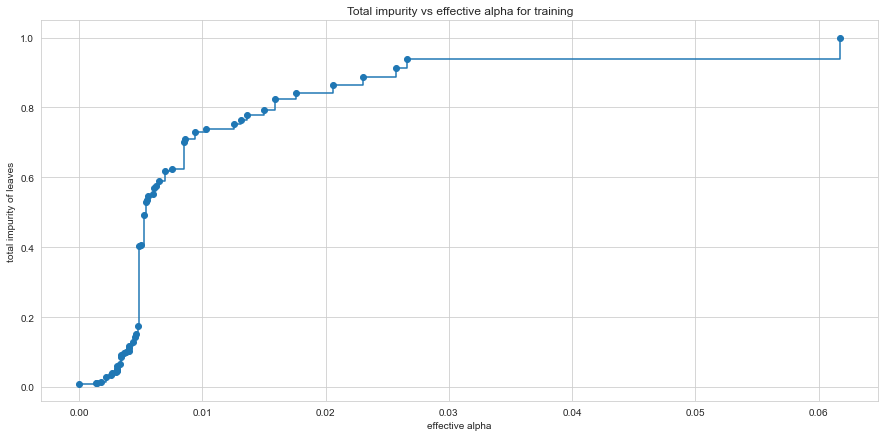

In [90]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post') # removed last one since it is a single node without leaves
ax.set_title('Total impurity vs effective alpha for training')
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurity of leaves')

***
### Next get accuracy vs alpha for train/test 
### In other words trim leaves from decision tree so as to balance overfit while still keeping good test score
***

In [156]:
# build train classifiers 
clfs=[]
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=10, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# get scores on both train test
train_scores= [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

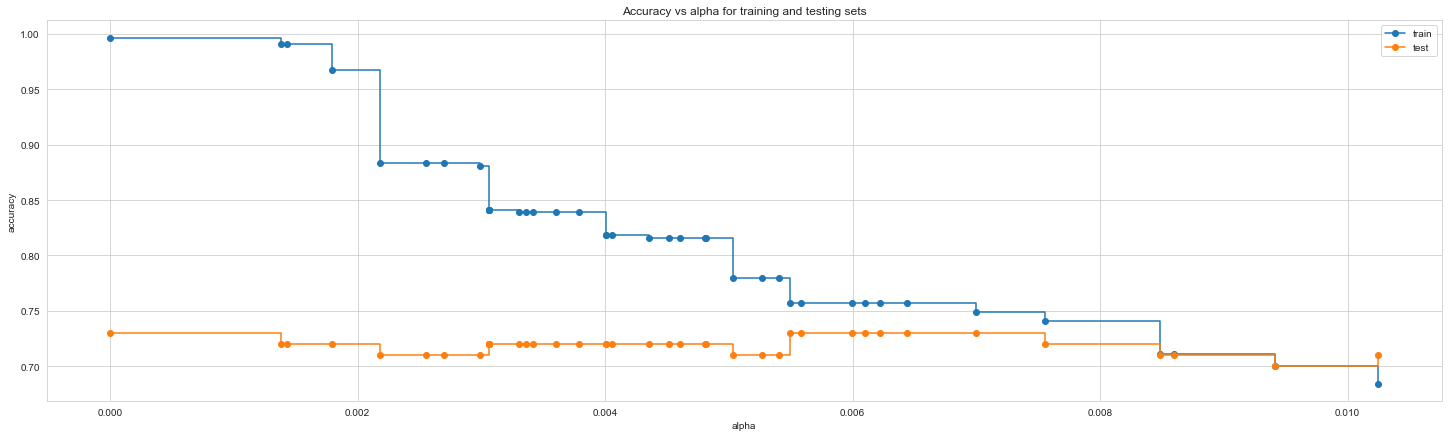

In [181]:
index = 40

fig, ax = plt.subplots(figsize=(25,7))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[:index], train_scores[:index], marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[:index], test_scores[:index], marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [188]:
# ML model 
clf = DecisionTreeClassifier(random_state=10, ccp_alpha=0.0102)
clf.fit(X_train, y_train)

train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print('train_accuracy: ', train_accuracy)
print('test_accuracy: ', test_accuracy)


train_accuracy:  0.6844444444444444
test_accuracy:  0.71


***
### Marked SL = 0.35
### CL = 1 - 0.35 = 0.65
### Choosing ccp_alpha = 0.0102 gives us test > train > CL while still keeping somewhat descent accuracy on test (previosuly 0.77 now 0.71, GENERALIZED MODEL
### Final results->
>### train_accuracy = 0.68
>### test_acuracy = 0.71
>### SL qualify = Yes
>### Generalized Model
***

In [191]:
pred = clf.predict(tdif_features)
print(classification_report(pred, label))

              precision    recall  f1-score   support

           0       0.95      0.62      0.75       765
           1       0.42      0.90      0.57       235

    accuracy                           0.69      1000
   macro avg       0.69      0.76      0.66      1000
weighted avg       0.83      0.69      0.71      1000

